In [1]:
# !pip install plotly
# !pip install chart_studio
# !pip install cufflinks
# !pip install missingno

In [2]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

import seaborn as sns
plt.style.use('seaborn')
sns.set(font_scale = 1)
sns.set_style('whitegrid')

import plotly.express as px

import chart_studio.plotly as py
import cufflinks as cf
cf.go_offline(connected = True)

import plotly.graph_objects as go
import plotly.offline as pyo
pyo.init_notebook_mode()

from plotly.subplots import make_subplots

import missingno as msno

import warnings
warnings.filterwarnings(action = 'ignore')

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 서울시 공공자전거(따릉이) 데이터 분석 및 시각화
# Seoul public bike data analysis and data visualisation

---
# 각 데이터 구조 확인
- 전처리 및 시각화 전 각 csv파일 데이터 확인(컬럼명, 결측치 등)

In [3]:
Bike_rental_info = pd.read_csv('data/공공자전거 대여소 정보(21.06월 기준).csv', encoding = 'cp949')
Bike_rental_use = pd.read_csv('data/공공자전거 대여소별 이용정보_21.02_21.06.csv', encoding = 'cp949')
Bike_time_info = pd.read_csv('data/공공자전거 이용정보(시간대별)_21.6.csv', encoding = 'cp949')

print(Bike_rental_info.shape)
print(Bike_rental_use.shape)
print(Bike_time_info.shape)
Bike_rental_info.head()

(2467, 10)
(14749, 4)
(1048575, 12)


대여소\n번호   보관소(대여소)명  자치구               상세주소         위도          경도  \
0      102  망원역 1번출구 앞  마포구  서울특별시 마포구 월드컵로 72  37.555649  126.910629   
1      103  망원역 2번출구 앞  마포구  서울특별시 마포구 월드컵로 79  37.554951  126.910835   
2      104  합정역 1번출구 앞  마포구   서울특별시 마포구 양화로 59  37.550629  126.914986   
3      105  합정역 5번출구 앞  마포구   서울특별시 마포구 양화로 48  37.550007  126.914825   
4      106  합정역 7번출구 앞  마포구    서울특별시 마포구 독막로 4  37.548645  126.912826   

       설치\n시기  거치대수_LCD  거치대수_QR 운영\n방식  
0  2015-09-06      20.0      NaN    LCD  
1  2015-09-06      14.0      NaN    LCD  
2  2015-09-06      13.0      NaN    LCD  
3  2015-09-06       5.0      NaN    LCD  
4  2015-09-06      10.0      NaN    LCD

In [4]:
# Bike_rental_info.info()
Bike_rental_use.head()
# Bike_time_info.info()

대여소 그룹                           대여소 명  대여 일자 / 월   대여 건수
0    강남구                2301. 현대고등학교 건너편   202102.0  1713.0
1    강남구  2302. 교보타워 버스정류장(신논현역 3번출구 후면)   202102.0   538.0
2    강남구                  2303. 논현역 7번출구   202102.0   440.0
3    강남구         2304. 신영 ROYAL PALACE 앞   202102.0   156.0
4    강남구              2305. MCM 본사 직영점 앞   202102.0   197.0

In [5]:
# pd.set_option('float_format', '{:.2f}'.format)
Bike_time_info.describe()

대여시간         대여소번호          이용건수          이동거리          사용시간
count  1.048575e+06  1.048575e+06  1.048575e+06  1.048575e+06  1.048575e+06
mean   1.426022e+01  1.676636e+03  1.134890e+00  3.404032e+03  2.872880e+01
std    5.738104e+00  1.236026e+03  4.509661e-01  4.316724e+03  3.276304e+01
min    0.000000e+00  3.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00
25%    1.000000e+01  6.740000e+02  1.000000e+00  9.539500e+02  8.000000e+00
50%    1.500000e+01  1.362000e+03  1.000000e+00  1.924780e+03  1.700000e+01
75%    1.900000e+01  2.373000e+03  1.000000e+00  4.081205e+03  3.800000e+01
max    2.300000e+01  9.999700e+04  1.800000e+01  4.366047e+05  1.327000e+03

In [6]:
# Bike_rental_info.describe(include = np.object_)
# Bike_rental_use.describe(include = np.object_)
Bike_time_info.describe(include = np.object_)

대여일자                대여소명   대여구분코드      성별    연령대코드      운동량  \
count      1048575             1048575  1048575  588107  1048575  1048575   
unique          13                2435        4       4        7    59044   
top     2021-06-04  502. 뚝섬유원지역 1번출구 앞      정기권       M      20대        0   
freq        100650                2850   849905  346657   425488    52687   

            탄소량  
count   1048575  
unique     1269  
top           0  
freq      53445

### 각 데이터의 결측치 확인

In [7]:
Bike_rental_info.isnull().sum() # 대여소 정보

대여소\n번호         0
보관소(대여소)명       0
자치구             0
상세주소            0
위도              0
경도              0
설치\n시기          0
거치대수_LCD     1013
거치대수_QR      1453
운영\n방식          0
dtype: int64

<AxesSubplot:>

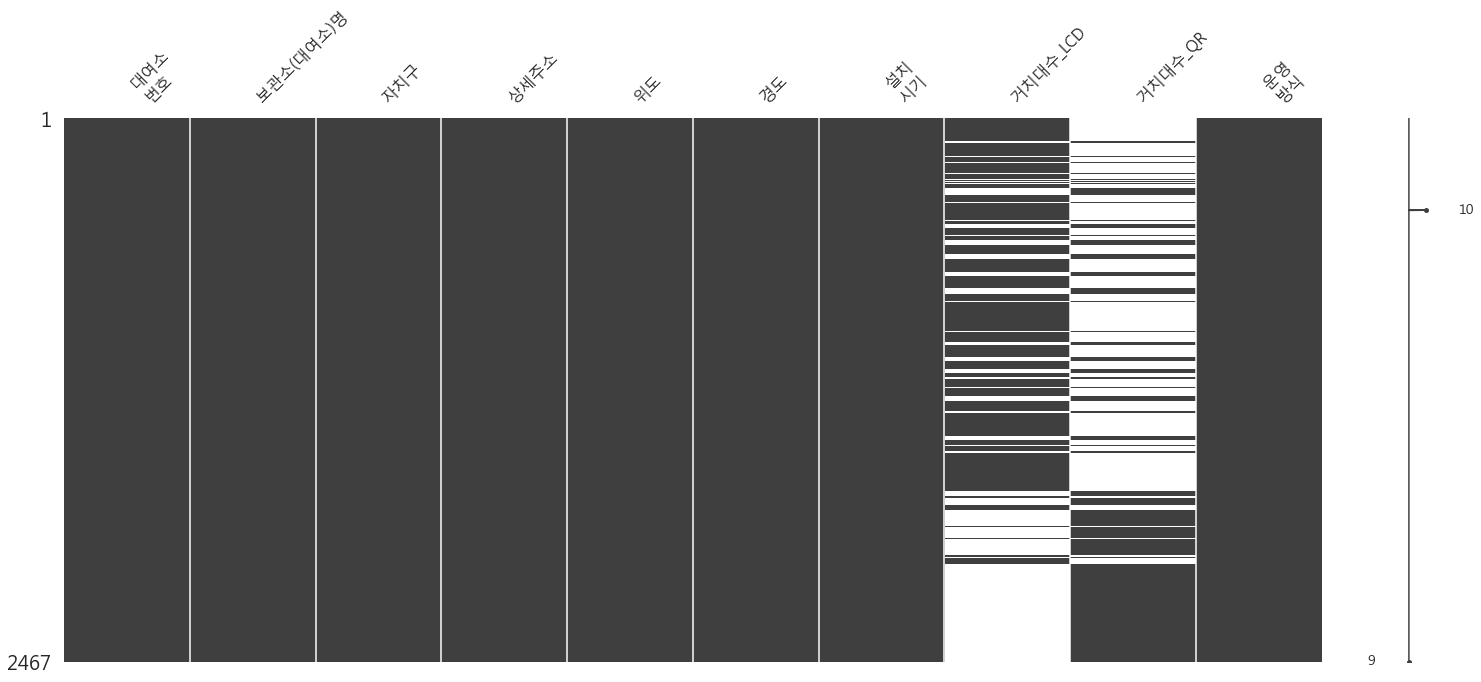

In [8]:
msno.matrix(Bike_rental_info)

In [9]:
Bike_rental_use.isnull().sum() # 대여소별 이용정보

대여소 그룹       2973
대여소 명        2973
대여 일자 / 월    2973
대여 건수        2973
dtype: int64

<AxesSubplot:>

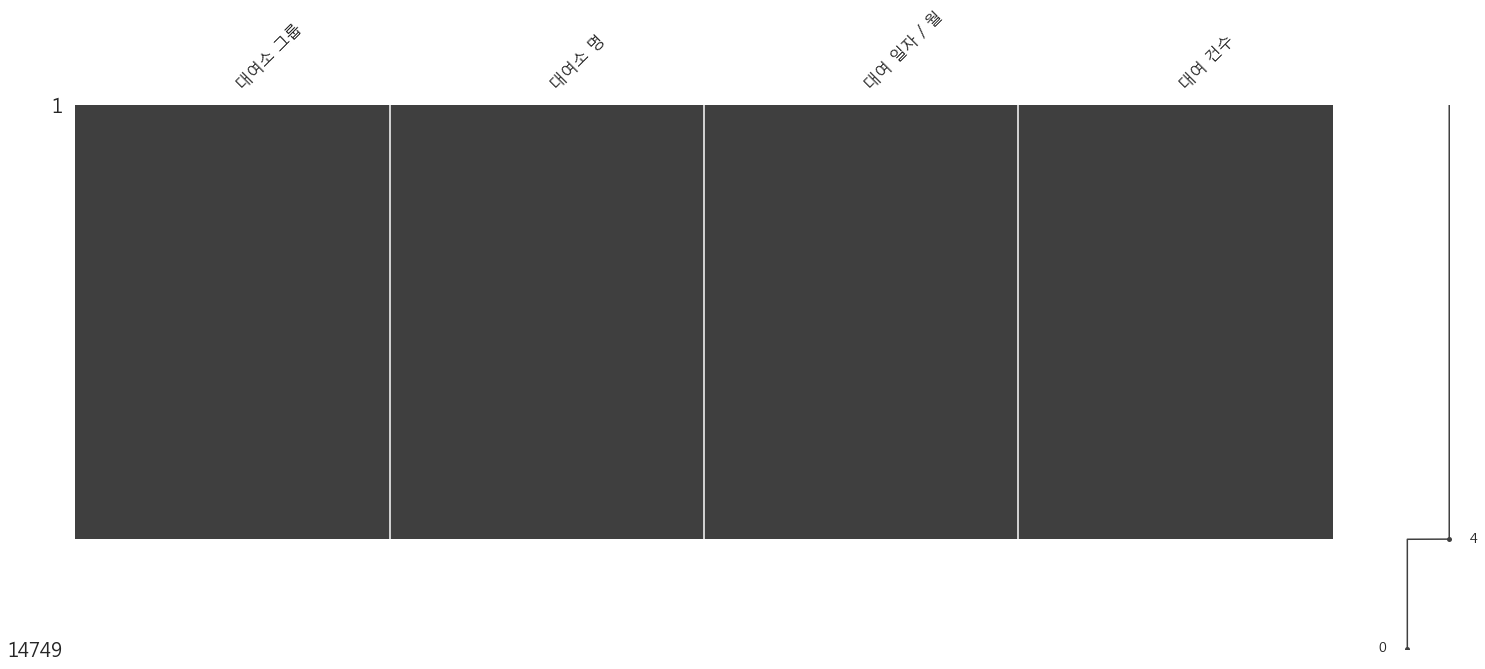

In [10]:
msno.matrix(Bike_rental_use)

In [11]:
Bike_time_info.isnull().sum() # 시간대별 이용 정보

대여일자           0
대여시간           0
대여소번호          0
대여소명           0
대여구분코드         0
성별        460468
연령대코드          0
이용건수           0
운동량            0
탄소량            0
이동거리           0
사용시간           0
dtype: int64

<AxesSubplot:>

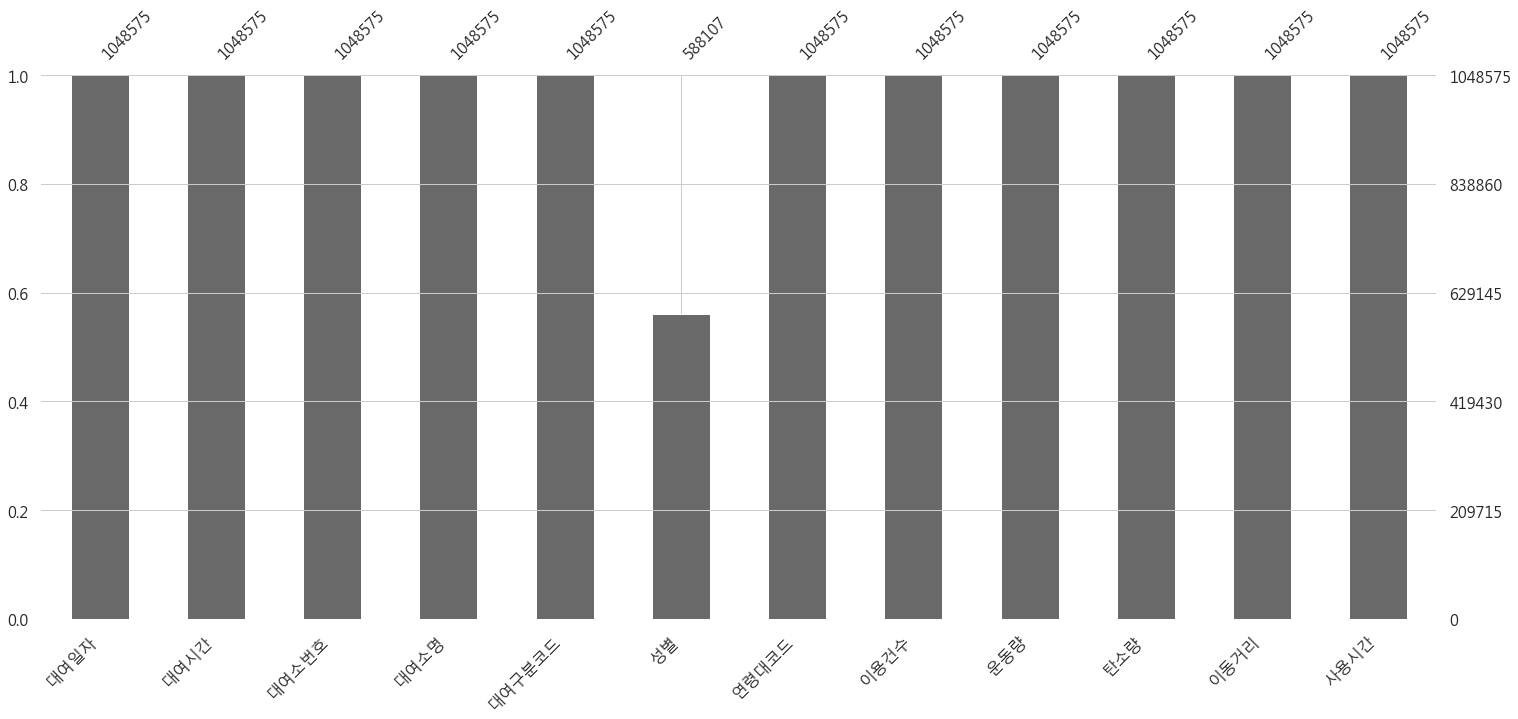

In [12]:
msno.bar(Bike_time_info)

---
# 데이터 전처리 준비

### 각 데이터의 컬럼 명 교체 및 필요없는 컬럼 삭제

In [13]:
Bike_rental_info.columns = ['대여소번호', '대여소명', '자치구', '상세주소', '위도', '경도'\
                            , '설치시기', '거치대수LCD', '거치대수QR', '운영방식']
Bike_rental_info.head()

대여소번호        대여소명  자치구               상세주소         위도          경도  \
0    102  망원역 1번출구 앞  마포구  서울특별시 마포구 월드컵로 72  37.555649  126.910629   
1    103  망원역 2번출구 앞  마포구  서울특별시 마포구 월드컵로 79  37.554951  126.910835   
2    104  합정역 1번출구 앞  마포구   서울특별시 마포구 양화로 59  37.550629  126.914986   
3    105  합정역 5번출구 앞  마포구   서울특별시 마포구 양화로 48  37.550007  126.914825   
4    106  합정역 7번출구 앞  마포구    서울특별시 마포구 독막로 4  37.548645  126.912826   

         설치시기  거치대수LCD  거치대수QR 운영방식  
0  2015-09-06     20.0     NaN  LCD  
1  2015-09-06     14.0     NaN  LCD  
2  2015-09-06     13.0     NaN  LCD  
3  2015-09-06      5.0     NaN  LCD  
4  2015-09-06     10.0     NaN  LCD

In [14]:
Bike_rental_use.columns = ['대여소그룹', '대여소명', '대여일자/월', '대여건수']
Bike_rental_use.head()

대여소그룹                            대여소명    대여일자/월    대여건수
0   강남구                2301. 현대고등학교 건너편  202102.0  1713.0
1   강남구  2302. 교보타워 버스정류장(신논현역 3번출구 후면)  202102.0   538.0
2   강남구                  2303. 논현역 7번출구  202102.0   440.0
3   강남구         2304. 신영 ROYAL PALACE 앞  202102.0   156.0
4   강남구              2305. MCM 본사 직영점 앞  202102.0   197.0

In [15]:
# Bike_time_info.head()
Bike_rental_info = Bike_rental_info.drop(['상세주소', '위도', '경도'], axis = 1)

print(Bike_rental_info.shape)
Bike_rental_info.head()

(2467, 7)


대여소번호        대여소명  자치구        설치시기  거치대수LCD  거치대수QR 운영방식
0    102  망원역 1번출구 앞  마포구  2015-09-06     20.0     NaN  LCD
1    103  망원역 2번출구 앞  마포구  2015-09-06     14.0     NaN  LCD
2    104  합정역 1번출구 앞  마포구  2015-09-06     13.0     NaN  LCD
3    105  합정역 5번출구 앞  마포구  2015-09-06      5.0     NaN  LCD
4    106  합정역 7번출구 앞  마포구  2015-09-06     10.0     NaN  LCD

In [16]:
Bike_rental_use = Bike_rental_use.drop(['대여소그룹'], axis = 1)

Bike_rental_use.head()

대여소명    대여일자/월    대여건수
0                2301. 현대고등학교 건너편  202102.0  1713.0
1  2302. 교보타워 버스정류장(신논현역 3번출구 후면)  202102.0   538.0
2                  2303. 논현역 7번출구  202102.0   440.0
3         2304. 신영 ROYAL PALACE 앞  202102.0   156.0
4              2305. MCM 본사 직영점 앞  202102.0   197.0

In [17]:
Bike_rental_info = Bike_rental_info.fillna(0)

Bike_rental_info.isnull().sum()

대여소번호      0
대여소명       0
자치구        0
설치시기       0
거치대수LCD    0
거치대수QR     0
운영방식       0
dtype: int64

In [18]:
Bike_time_info['성별'].unique()

array([nan, 'F', 'M', 'm', 'f'], dtype=object)

In [19]:
Bike_time_info[Bike_time_info['성별'] == 'f'] = 'F'
Bike_time_info[Bike_time_info['성별'] == 'm'] = 'M'

Bike_time_info['성별'].unique()

array([nan, 'F', 'M'], dtype=object)

In [20]:
# filt = (Bike_rental_info['대여소명'] == '현대고등학교 건너편')
# Bike_rental_info[filt]
# Bike_rental_use의 대여소명 앞자리 숫자가 대여소 번호와 일치하므로 숫자 분리후 대여소번호 컬럼 생성

Bike_rental_use['대여소번호'] = Bike_rental_use['대여소명'].str.split('.', expand = True)[0]

Bike_rental_use['new_대여소명'] = Bike_rental_use['대여소명'].str.split('.', expand = True)[1]

print(Bike_rental_use.shape)
print(Bike_rental_use.isnull().sum())

Bike_rental_use.head()

(14749, 5)
대여소명        2973
대여일자/월      2973
대여건수        2973
대여소번호       2973
new_대여소명    3002
dtype: int64


대여소명    대여일자/월    대여건수 대여소번호  \
0                2301. 현대고등학교 건너편  202102.0  1713.0  2301   
1  2302. 교보타워 버스정류장(신논현역 3번출구 후면)  202102.0   538.0  2302   
2                  2303. 논현역 7번출구  202102.0   440.0  2303   
3         2304. 신영 ROYAL PALACE 앞  202102.0   156.0  2304   
4              2305. MCM 본사 직영점 앞  202102.0   197.0  2305   

                    new_대여소명  
0                 현대고등학교 건너편  
1   교보타워 버스정류장(신논현역 3번출구 후면)  
2                   논현역 7번출구  
3          신영 ROYAL PALACE 앞  
4               MCM 본사 직영점 앞

In [21]:
Bike_rental_use[Bike_rental_use['new_대여소명'].isnull()].head()

대여소명    대여일자/월   대여건수     대여소번호 new_대여소명
1980      상담센터  202102.0   32.0      상담센터     None
1981  상암센터 정비실  202102.0    8.0  상암센터 정비실     None
1982       위트콤  202102.0  375.0       위트콤     None
1983      중랑센터  202102.0   16.0      중랑센터     None
2234   대여소명 없음  202102.0    1.0   대여소명 없음     None

In [22]:
Bike_rental_use = Bike_rental_use.dropna(subset = ['new_대여소명'])

print(Bike_rental_use.shape)
print(Bike_rental_use.isnull().sum())

Bike_rental_use.head()

(11747, 5)
대여소명        0
대여일자/월      0
대여건수        0
대여소번호       0
new_대여소명    0
dtype: int64


대여소명    대여일자/월    대여건수 대여소번호  \
0                2301. 현대고등학교 건너편  202102.0  1713.0  2301   
1  2302. 교보타워 버스정류장(신논현역 3번출구 후면)  202102.0   538.0  2302   
2                  2303. 논현역 7번출구  202102.0   440.0  2303   
3         2304. 신영 ROYAL PALACE 앞  202102.0   156.0  2304   
4              2305. MCM 본사 직영점 앞  202102.0   197.0  2305   

                    new_대여소명  
0                 현대고등학교 건너편  
1   교보타워 버스정류장(신논현역 3번출구 후면)  
2                   논현역 7번출구  
3          신영 ROYAL PALACE 앞  
4               MCM 본사 직영점 앞

In [23]:
# Bike_time_info.head()

Bike_time_info['new_대여소명'] = Bike_time_info['대여소명'].str.split('.', expand = True)[1]

print(Bike_time_info.isnull().sum())
print(Bike_time_info.shape)

Bike_time_info.head()

대여일자             0
대여시간             0
대여소번호            0
대여소명             0
대여구분코드           0
성별          460468
연령대코드            0
이용건수             0
운동량              0
탄소량              0
이동거리             0
사용시간             0
new_대여소명       334
dtype: int64
(1048575, 13)


대여일자 대여시간 대여소번호                   대여소명 대여구분코드   성별 연령대코드 이용건수    운동량  \
0  2021-06-01    0  2169         2169. 봉천역 2번출구    정기권  NaN  ~10대    1   8.75   
1  2021-06-01    0  1450        1450. 화랑대역 7번출구    정기권  NaN  ~10대    1  54.31   
2  2021-06-01    0  1282  1282. 송파소방서 맞은편(성내4교)    정기권  NaN  ~10대    1   26.3   
3  2021-06-01    0  1288         1288. 문정중교 사거리    정기권  NaN  ~10대    1   27.5   
4  2021-06-01    0  1737       1737. 하나은행 (창동점)    정기권  NaN  ~10대    1  42.46   

    탄소량     이동거리 사용시간          new_대여소명  
0  0.08   350.53    3          봉천역 2번출구  
1  0.49   2110.0   14         화랑대역 7번출구  
2  0.18   772.25    6   송파소방서 맞은편(성내4교)  
3   0.3  1285.82    5          문정중교 사거리  
4  0.46  1985.56   21        하나은행 (창동점)

In [24]:
# Bike_time_info[Bike_time_info['new_대여소명'].isnull()].head()

Bike_time_info = Bike_time_info.dropna(subset = ['new_대여소명'])

print(Bike_time_info.isnull().sum())
print(Bike_time_info.shape)

Bike_time_info.head()

대여일자             0
대여시간             0
대여소번호            0
대여소명             0
대여구분코드           0
성별          460443
연령대코드            0
이용건수             0
운동량              0
탄소량              0
이동거리             0
사용시간             0
new_대여소명         0
dtype: int64
(1048241, 13)


대여일자 대여시간 대여소번호                   대여소명 대여구분코드   성별 연령대코드 이용건수    운동량  \
0  2021-06-01    0  2169         2169. 봉천역 2번출구    정기권  NaN  ~10대    1   8.75   
1  2021-06-01    0  1450        1450. 화랑대역 7번출구    정기권  NaN  ~10대    1  54.31   
2  2021-06-01    0  1282  1282. 송파소방서 맞은편(성내4교)    정기권  NaN  ~10대    1   26.3   
3  2021-06-01    0  1288         1288. 문정중교 사거리    정기권  NaN  ~10대    1   27.5   
4  2021-06-01    0  1737       1737. 하나은행 (창동점)    정기권  NaN  ~10대    1  42.46   

    탄소량     이동거리 사용시간          new_대여소명  
0  0.08   350.53    3          봉천역 2번출구  
1  0.49   2110.0   14         화랑대역 7번출구  
2  0.18   772.25    6   송파소방서 맞은편(성내4교)  
3   0.3  1285.82    5          문정중교 사거리  
4  0.46  1985.56   21        하나은행 (창동점)

In [25]:
# Bike_rental_info.info()
Bike_rental_info['대여소번호'] = Bike_rental_info['대여소번호'].astype(object)

Bike_rental_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2467 entries, 0 to 2466
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   대여소번호    2467 non-null   object 
 1   대여소명     2467 non-null   object 
 2   자치구      2467 non-null   object 
 3   설치시기     2467 non-null   object 
 4   거치대수LCD  2467 non-null   float64
 5   거치대수QR   2467 non-null   float64
 6   운영방식     2467 non-null   object 
dtypes: float64(2), object(5)
memory usage: 135.0+ KB


In [26]:
# Bike_time_info.info()

Bike_time_info['이용건수'] = pd.to_numeric(Bike_time_info['이용건수'])
Bike_time_info['이동거리'] = pd.to_numeric(Bike_time_info['이동거리'])
Bike_time_info['사용시간'] = pd.to_numeric(Bike_time_info['사용시간'])

Bike_time_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1048241 entries, 0 to 1048574
Data columns (total 13 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   대여일자      1048241 non-null  object 
 1   대여시간      1048241 non-null  object 
 2   대여소번호     1048241 non-null  object 
 3   대여소명      1048241 non-null  object 
 4   대여구분코드    1048241 non-null  object 
 5   성별        587798 non-null   object 
 6   연령대코드     1048241 non-null  object 
 7   이용건수      1048241 non-null  int64  
 8   운동량       1048241 non-null  object 
 9   탄소량       1048241 non-null  object 
 10  이동거리      1048241 non-null  float64
 11  사용시간      1048241 non-null  int64  
 12  new_대여소명  1048241 non-null  object 
dtypes: float64(1), int64(2), object(10)
memory usage: 112.0+ MB


In [27]:
# Bike_time_info[Bike_time_info['운동량'] == r'\N'].head()

Bike_time_info['운동량'][Bike_time_info['운동량'] == r'\N'] = -1
Bike_time_info['탄소량'][Bike_time_info['탄소량'] == r'\N'] = -1

In [28]:
Bike_time_info['운동량'] = pd.to_numeric(Bike_time_info['운동량'])
Bike_time_info['탄소량'] = pd.to_numeric(Bike_time_info['탄소량'])

Bike_time_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1048241 entries, 0 to 1048574
Data columns (total 13 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   대여일자      1048241 non-null  object 
 1   대여시간      1048241 non-null  object 
 2   대여소번호     1048241 non-null  object 
 3   대여소명      1048241 non-null  object 
 4   대여구분코드    1048241 non-null  object 
 5   성별        587798 non-null   object 
 6   연령대코드     1048241 non-null  object 
 7   이용건수      1048241 non-null  int64  
 8   운동량       1048241 non-null  float64
 9   탄소량       1048241 non-null  float64
 10  이동거리      1048241 non-null  float64
 11  사용시간      1048241 non-null  int64  
 12  new_대여소명  1048241 non-null  object 
dtypes: float64(3), int64(2), object(8)
memory usage: 112.0+ MB


In [29]:
Bike_rental_info['설치시기'] = pd.to_datetime(Bike_rental_info['설치시기'])
Bike_time_info['대여일자'] = pd.to_datetime(Bike_time_info['대여일자'])

# Bike_rental_info.info()
Bike_time_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1048241 entries, 0 to 1048574
Data columns (total 13 columns):
 #   Column    Non-Null Count    Dtype         
---  ------    --------------    -----         
 0   대여일자      1048241 non-null  datetime64[ns]
 1   대여시간      1048241 non-null  object        
 2   대여소번호     1048241 non-null  object        
 3   대여소명      1048241 non-null  object        
 4   대여구분코드    1048241 non-null  object        
 5   성별        587798 non-null   object        
 6   연령대코드     1048241 non-null  object        
 7   이용건수      1048241 non-null  int64         
 8   운동량       1048241 non-null  float64       
 9   탄소량       1048241 non-null  float64       
 10  이동거리      1048241 non-null  float64       
 11  사용시간      1048241 non-null  int64         
 12  new_대여소명  1048241 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(7)
memory usage: 112.0+ MB


---
# 시각화

## 이동거리 Top20 대여소 확인(bar)

In [30]:
Bike_time_info_distance = Bike_time_info.groupby('new_대여소명')['이동거리'].mean().reset_index().sort_values(by = \
                                                                                    ['이동거리'], ascending = False)
Bike_time_info_distance.head()

new_대여소명         이동거리
1024   석수역1번출구 앞 (SK주유소)  9454.134824
504     독산보도육교 앞 자전거 보관소  9365.995928
1880            흑석역 1번출구  9293.938800
1364            옥수역 3번출구  9202.376468
440                당산육갑문  8888.730539

In [31]:
Bike_time_info_distance_top20 = Bike_time_info_distance.head(20).sort_values(by = ['이동거리'], ascending = False)

fig = px.bar(Bike_time_info_distance_top20, x = 'new_대여소명', y = '이동거리', color = '이동거리')
fig.update_layout(title = dict(text = '대여소별 이동거리 TOP20', font_size = 20), xaxis = dict(title = '대여소명')\
                 , template = 'plotly_white')

- 이동거리가 가장 많은 대여소는 석수역1번출구 앞(SK주유소)

## 사용시간 Top20 대여소 확인(bar)

In [32]:
Bike_time_info_time = Bike_time_info.groupby('new_대여소명')['사용시간'].mean().reset_index().sort_values(by = \
                                                                                    ['사용시간'], ascending = False)
Bike_time_info_time.head()

new_대여소명       사용시간
1291    여의나루역 1번출구 앞  69.342411
629       마포구민체육센터 앞  63.400785
1829      현대고등학교 건너편  63.398506
440            당산육갑문  62.896533
566    뚝섬유원지역 1번출구 앞  61.401193

In [33]:
Bike_time_info_time_top20 = Bike_time_info_time.head(20).sort_values(by = ['사용시간'], ascending = False)

fig = px.bar(Bike_time_info_time_top20, x = 'new_대여소명', y = '사용시간', color = '사용시간')
fig.update_layout(title = dict(text = '사용시간 TOP20 대여소', font_size = 20), xaxis = dict(title = '대여소명')\
                 , template = 'plotly_white')

- 사용시간이 가장 많은 대여소는 여의나루역 1번출구 앞
- 이동거리가 가장 많다고 사용시간이 가장 많은건 아님을 확인

## 따릉이 이동거리와 운동량의 상관관계(scatterplot)

In [34]:
# fig, axs = plt.subplots(1, 1, figsize = (18, 8))

# sns.jointplot(x = Bike_time_info['이동거리'], y = Bike_time_info['운동량'], kind = 'scatter')

# axs.set_xlim(-10000, 150000)
# axs.set_title('이동거리와 운동량의 관계', size = 20)
# plt.show()

- jointplot 으로 구현 하려 했으나 에러 발생  
 error name : cannot allocate memory for array

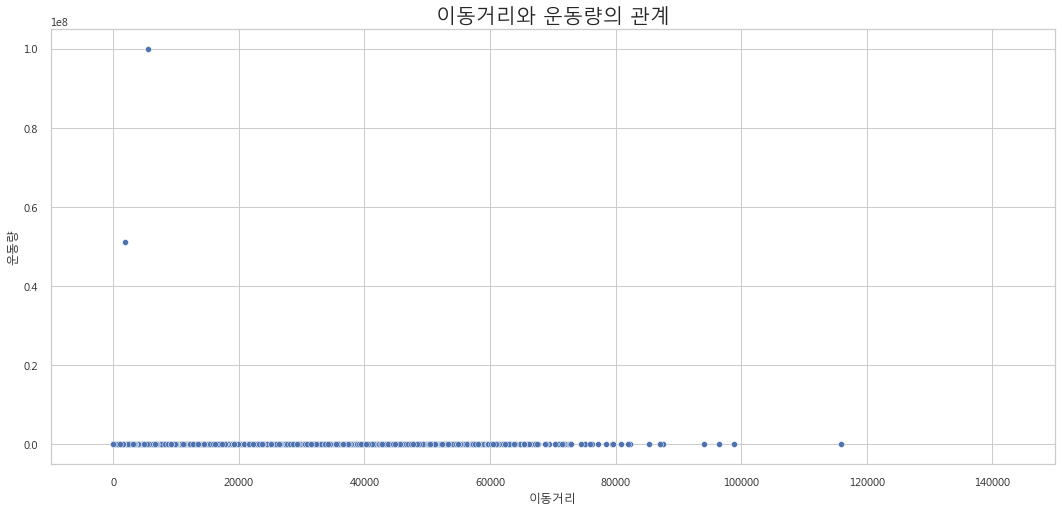

In [35]:
fig, axs = plt.subplots(1, 1, figsize = (18, 8))
sns.scatterplot(data = Bike_time_info, x = '이동거리', y = '운동량')
axs.set_xlim(-10000, 150000)
axs.set_title('이동거리와 운동량의 관계', size = 20)
plt.show()

- 그래프가 이상해서 운동량이 높은 데이터 확인 필요!

In [36]:
Bike_time_info.sort_values(by = '운동량', ascending = False).head()

대여일자 대여시간 대여소번호              대여소명 대여구분코드   성별 연령대코드  이용건수  \
972059 2021-06-12   11   300        300. 정동사거리    정기권    M   50대     1   
78300  2021-06-01   21   346       346. 맥스타일 앞    정기권    M   50대     1   
607835 2021-06-08    8   267    267. 삼성화재 사옥 옆    정기권  NaN   30대     1   
942812 2021-06-11   22   228  228. 선유도역 3번출구 앞    일일권    F   20대     1   
345276 2021-06-05   12  2601  2601. 석촌호수 서호사거리    정기권  NaN   20대     2   

                운동량     탄소량       이동거리  사용시간      new_대여소명  
972059  99999999.99    1.29    5562.20    33         정동사거리  
78300   51105508.89    0.44    1894.48    12        맥스타일 앞  
607835     12621.37  101.29  436604.68     8     삼성화재 사옥 옆  
942812     10271.72    4.88   21020.00   130   선유도역 3번출구 앞  
345276      7092.92   46.23  199258.30    15    석촌호수 서호사거리

In [37]:
filt = Bike_time_info['운동량'] > 50000000
Bike_time_info[filt].index

Int64Index([78300, 972059], dtype='int64')

In [38]:
Bike_time_info.drop(index = Bike_time_info[filt].index, inplace = True)

- 운동량이 비정상적으로 높은 데이터 2개 확인하여 제거

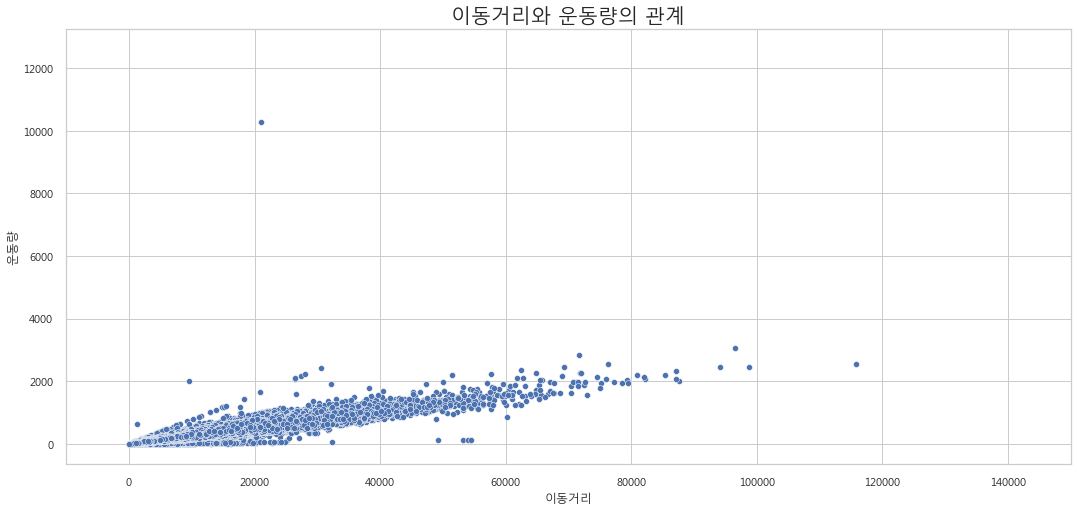

In [39]:
fig, axs = plt.subplots(1, 1, figsize = (18, 8))
sns.scatterplot(data = Bike_time_info, x = '이동거리', y = '운동량')
axs.set_xlim(-10000, 150000)
axs.set_title('이동거리와 운동량의 관계', size = 20)
plt.show()

- 운동량이 비 정상적인 데이터 2개 제거 후 정상적인 그래프 실행 확인
- 이동거리가 길 수록 운동량도 늘어남

## 따릉이 이동거리와 발생하는 탄소량 상관관계(scatterplot)

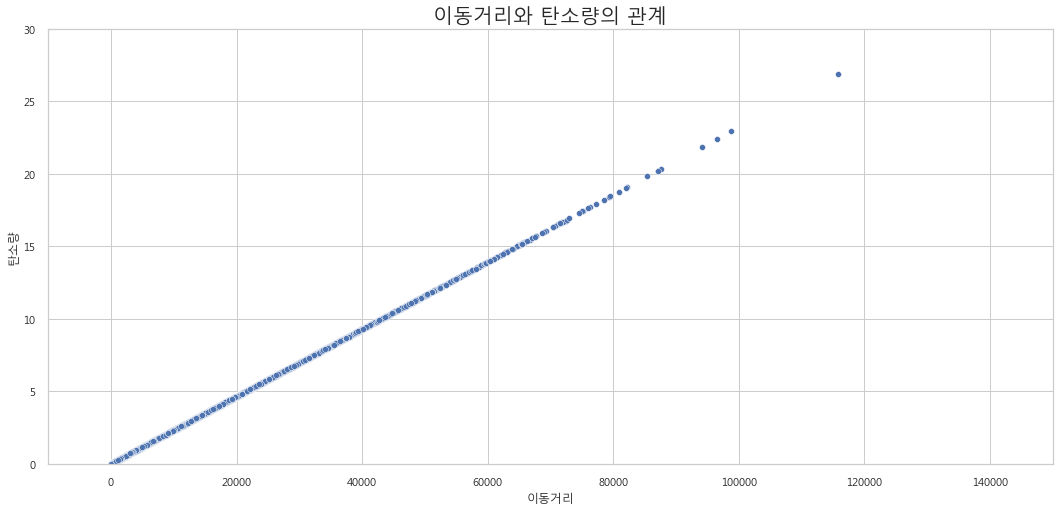

In [40]:
fig, axs = plt.subplots(1, 1, figsize = (18, 8))
sns.scatterplot(data = Bike_time_info, x = '이동거리', y = '탄소량')
axs.set_xlim(-10000, 150000)
axs.set_ylim(0, 30)
axs.set_title('이동거리와 탄소량의 관계', size = 20)
plt.show()

- 이동거리가 길수록 발생하는 탄소량이 눈에 띄는 예외적인 오차 없이 매우 일정하게 늘어나는 것을 확인

## 따릉이 이동거리와 운동량 남성 여성 비교(scatterplot)

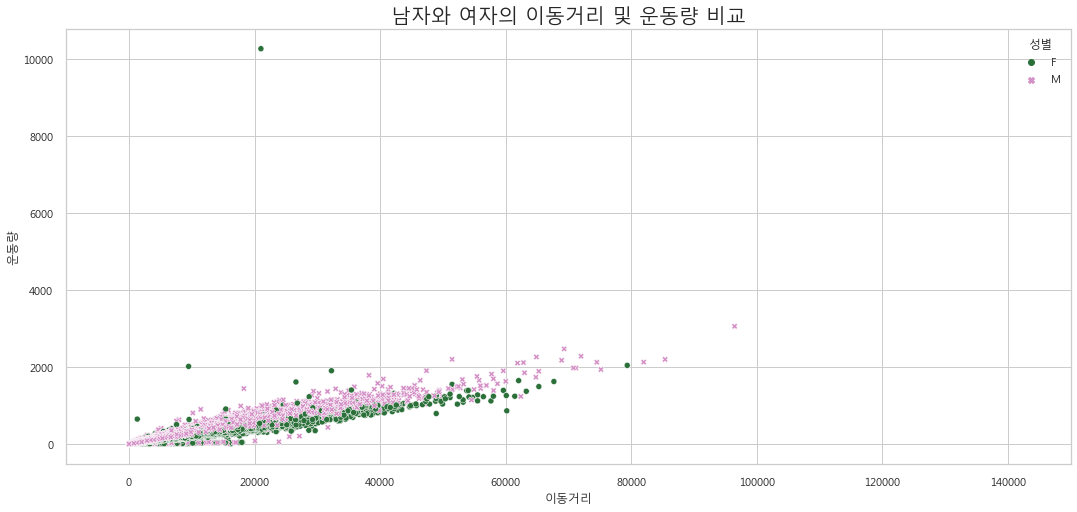

In [41]:
# Bike_time_info.head()
fig, axs = plt.subplots(figsize = (18, 8))

sns.scatterplot(data = Bike_time_info, x = '이동거리', y = '운동량', hue = '성별', style = '성별',
                palette = 'cubehelix')
axs.set_xlim(-10000, 150000)
axs.set_title('남자와 여자의 이동거리 및 운동량 비교', size = 20)
plt.show()

- 대체적으로 남성이 여성보다 운동량이 높음을 확인

## 따릉이 이동거리와 운동량 연령별 비교(scatterplot)

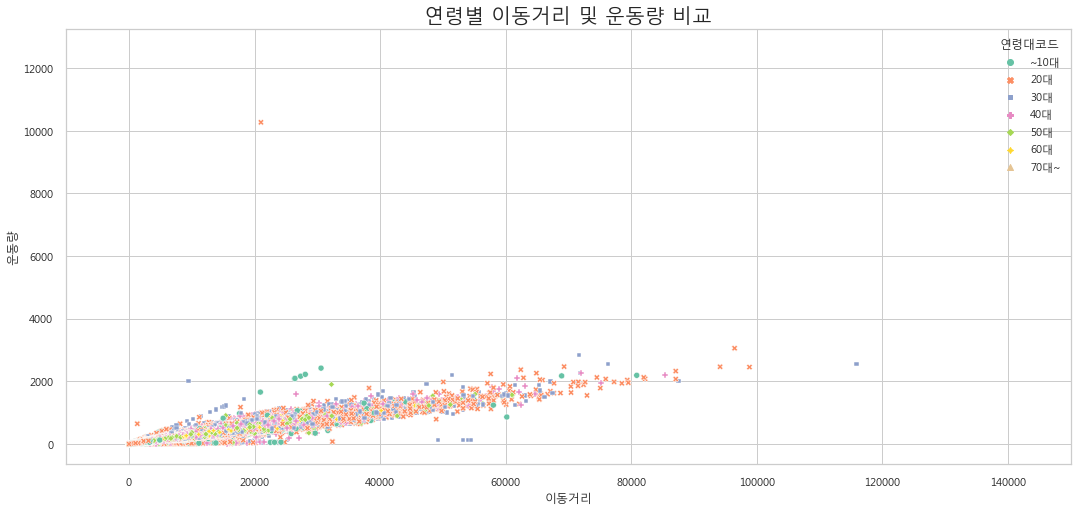

In [42]:
fig, axs = plt.subplots(figsize = (18, 8))

sns.scatterplot(data = Bike_time_info, x = '이동거리', y = '운동량', hue = '연령대코드', style = '연령대코드',
                palette = 'Set2')
axs.set_xlim(-10000, 150000)
axs.set_title('연령별 이동거리 및 운동량 비교', size = 20)
plt.show()

- 20대가 다른 연령대에 비해서 이동거리와 운동량 모두 평균적으로 높음을 확인

## 따릉이 이용 건수 남성 여성 비교(barh)

In [43]:
Bike_time_info_gender = Bike_time_info['성별'].value_counts().reset_index()
Bike_time_info_gender.columns = ['성별', '이용 수']

fig = px.bar(Bike_time_info_gender, x = '이용 수', y = '성별', orientation = 'h', color = '이용 수')
fig.update_layout(title = dict(text = '남자 여자 이용 수', font_size = 20), yaxis = dict(title = '성별')\
                 , template = 'plotly_white')

- 남성이 여성보다 따릉이를 더 많이 타는 것을 확인

## 연령별로 따릉이 사용시간 일별로 비교(plot)

In [44]:
Bike_time_info['대여일자_year'] = Bike_time_info['대여일자'].dt.year
Bike_time_info['대여일자_month'] = Bike_time_info['대여일자'].dt.month
Bike_time_info['대여일자_day'] = Bike_time_info['대여일자'].dt.day
Bike_time_day_age = pd.pivot_table(data = Bike_time_info, index = '대여일자_day', columns = '연령대코드'\
                                  , values = '사용시간', aggfunc = 'sum')
Bike_time_day_age
# Bike_time_info['대여일자'].unique()

연령대코드         20대     30대     40대     50대    60대   70대~    ~10대
대여일자_day                                                       
1          943232  600196  379730  254329  77796  10096   89576
2         1108545  718623  450011  292111  83645  11075  105447
3          221412  166528  133964  102914  35842   4232   20620
4         1204243  779321  471472  304705  87476   9798  128597
5         1372901  831024  524204  265441  69119  11285  161946
6         1228101  778354  511052  257619  67938   9741  160568
7          988759  660265  409845  272318  76206  10135   95984
8         1053530  694975  439698  288612  76080  11346   99940
9         1028703  679493  426330  279819  77396  11768  101253
10         538590  379371  276868  205030  63750   9219   53301
11        1017357  652788  434392  283881  77287  10360  113141
12        1175555  694468  445433  252943  63711   9665  147578
13         144673   75757   63360   52608  18122   2542   25150

In [45]:
layout = dict(title = dict(text = '일별 연령별 사용 시간', font_size = 20), \
             xaxis = dict(title = '대여일', dtick = 1), \
             yaxis = dict(title = '사용시간'))
Bike_time_day_age.iplot(kind = 'line', layout = layout)
# Bike_time_info.head()

- 2021.06 데이터의 일 수가 1 ~ 13일까지 밖에 없음  
- 2021.06.03일 따릉이 사용시간이 매우 적음

## 서울 자치구 별 따릉이 LCD, QR 총합 거치대수 확인(folium, geojson)

In [46]:
Bike_rental_info.head()
Bike_rental_info['총거치대수'] = Bike_rental_info['거치대수LCD'] + Bike_rental_info['거치대수QR']

Bike_rental_info.head()
# Bike_rental_info.shape

대여소번호        대여소명  자치구       설치시기  거치대수LCD  거치대수QR 운영방식  총거치대수
0   102  망원역 1번출구 앞  마포구 2015-09-06     20.0     0.0  LCD   20.0
1   103  망원역 2번출구 앞  마포구 2015-09-06     14.0     0.0  LCD   14.0
2   104  합정역 1번출구 앞  마포구 2015-09-06     13.0     0.0  LCD   13.0
3   105  합정역 5번출구 앞  마포구 2015-09-06      5.0     0.0  LCD    5.0
4   106  합정역 7번출구 앞  마포구 2015-09-06     10.0     0.0  LCD   10.0

In [47]:
Bike_rental_info_region = Bike_rental_info.groupby('자치구')['총거치대수'].sum().reset_index()
Bike_rental_info_region = Bike_rental_info_region.set_index('자치구')
Bike_rental_info_region.sort_values(by = '총거치대수', ascending = False).head()

총거치대수
자치구         
송파구   2270.0
강서구   2137.0
서초구   1772.0
영등포구  1766.0
강남구   1711.0

In [48]:
# !pip install folium
import json
import folium

geo_path = 'data/skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding = 'utf-8'))
# geo_str
Bike_rental_info_map = folium.Map(location = [37.5502, 126.982], zoom_start = 11, tiles = 'OpenStreetMap')

Bike_rental_info_map.choropleth(geo_data = geo_str, data = Bike_rental_info_region['총거치대수'],\
                               columns = ['자치구', '총거치대수'],\
                               fill_color = 'OrRd',\
                               key_on = 'feature.properties.name',\
                               legend_name = '자치구 별 따릉이 거치대 수')
Bike_rental_info_map

- 송파, 강서, 영등포, 서초가 다른 곳에 비해서 거치대수가 많음을 확인  
- .json 출처 github 주소 : https://github.com/southkorea/southkorea-maps

## 서울 자치구 별 따릉이 대여 건수 확인(folium, geojson)

In [49]:
Bike_rental_info['대여소번호'] = pd.to_numeric(Bike_rental_info['대여소번호'])
Bike_rental_use['대여소번호'] = pd.to_numeric(Bike_rental_use['대여소번호'])

Bike_rental_use.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11747 entries, 0 to 11775
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   대여소명      11747 non-null  object 
 1   대여일자/월    11747 non-null  float64
 2   대여건수      11747 non-null  float64
 3   대여소번호     11747 non-null  int64  
 4   new_대여소명  11747 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 550.6+ KB


In [50]:
# Bike_rental_use.head()
# Bike_rental_info.head()

Bike_merge = pd.merge(Bike_rental_info, Bike_rental_use, left_on = '대여소번호', right_on = '대여소번호')
Bike_merge.head()

대여소번호      대여소명_x  자치구       설치시기  거치대수LCD  거치대수QR 운영방식  총거치대수  \
0    102  망원역 1번출구 앞  마포구 2015-09-06     20.0     0.0  LCD   20.0   
1    102  망원역 1번출구 앞  마포구 2015-09-06     20.0     0.0  LCD   20.0   
2    102  망원역 1번출구 앞  마포구 2015-09-06     20.0     0.0  LCD   20.0   
3    102  망원역 1번출구 앞  마포구 2015-09-06     20.0     0.0  LCD   20.0   
4    102  망원역 1번출구 앞  마포구 2015-09-06     20.0     0.0  LCD   20.0   

            대여소명_y    대여일자/월    대여건수     new_대여소명  
0  102. 망원역 1번출구 앞  202102.0  1610.0   망원역 1번출구 앞  
1  102. 망원역 1번출구 앞  202103.0  2861.0   망원역 1번출구 앞  
2  102. 망원역 1번출구 앞  202104.0  3997.0   망원역 1번출구 앞  
3  102. 망원역 1번출구 앞  202105.0  3882.0   망원역 1번출구 앞  
4  102. 망원역 1번출구 앞  202106.0  4609.0   망원역 1번출구 앞

In [51]:
Bike_merge_use_data = Bike_merge[['대여소번호', '대여소명_x', '자치구', '총거치대수', '대여일자/월', '대여건수']]
Bike_merge_use_data.head()

대여소번호      대여소명_x  자치구  총거치대수    대여일자/월    대여건수
0    102  망원역 1번출구 앞  마포구   20.0  202102.0  1610.0
1    102  망원역 1번출구 앞  마포구   20.0  202103.0  2861.0
2    102  망원역 1번출구 앞  마포구   20.0  202104.0  3997.0
3    102  망원역 1번출구 앞  마포구   20.0  202105.0  3882.0
4    102  망원역 1번출구 앞  마포구   20.0  202106.0  4609.0

In [52]:
Bike_merge_use_data = Bike_merge_use_data[Bike_merge_use_data['대여일자/월'] == 202106]

Bike_merge_use_data.head()

대여소번호      대여소명_x  자치구  총거치대수    대여일자/월    대여건수
4     102  망원역 1번출구 앞  마포구   20.0  202106.0  4609.0
9     103  망원역 2번출구 앞  마포구   14.0  202106.0  4001.0
14    104  합정역 1번출구 앞  마포구   13.0  202106.0  1933.0
19    105  합정역 5번출구 앞  마포구    5.0  202106.0  1441.0
24    106  합정역 7번출구 앞  마포구   10.0  202106.0  4392.0

In [53]:
Bike_merge_use_data = Bike_merge_use_data.groupby('자치구')['대여건수'].sum().reset_index()
Bike_merge_use_data = Bike_merge_use_data.set_index('자치구')

Bike_merge_use_data.sort_values(by = '대여건수', ascending = False).head()

대여건수
자치구           
강서구   361675.0
송파구   294526.0
영등포구  260526.0
노원구   200594.0
마포구   195893.0

In [54]:
Bike_merge_use_data_map = folium.Map(location = [37.5502, 126.982], zoom_start = 11, tiles = 'OpenStreetMap')

Bike_merge_use_data_map.choropleth(geo_data = geo_str, data = Bike_merge_use_data['대여건수'],\
                               columns = ['자치구', '대여건수'],\
                               fill_color = 'PuBuGn',\
                               key_on = 'feature.properties.name',\
                               legend_name = '자치구 별 따릉이 총 대여건수')
Bike_merge_use_data_map

- 송파, 강서, 영등포는 거치대수, 대여건수 모두 많음
- 서초는 거치대수 대비 대여건수가 많지 않음

---
#### 리뷰
- folium을 활용하여 지도맵을 구현하는것에서 시간을 많이 까먹었지만 익숙해지면 유용할 것 같음
- folium과 geojson에 대한 정확한 개념 공부가 필요 할 것 같음